In [125]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv("processed_data/aggregated_123.csv")
# do not look at rows with empty mood or target
sample_days = ['1', '2', '3', '123']
for prefix in sample_days:
    df = df[np.isfinite(df[prefix + 'mood'])]
df = df[np.isfinite(df['target'])]
users = df['id'].unique()
attrs = list(df.columns.values)
_ = attrs.pop(0)

In [145]:
# fill empty cells with mean attr value per user
df_collection = {}
for id in users:
    for attr in attrs:
        df.loc[df.id == id, attr] = df.loc[df.id == id, attr].fillna(df.loc[df.id == id, attr].mean())

In [146]:
# Pearson corellation of attributes with target
# correlation of target with itself
for attr in attrs:
    print(attr + ': ', df['target'].corr(df[attr]))

123call:  -0.01970533640113596
2appCat.social:  -0.06166744730347393
123calltime:  -0.009340899070369354
2appCat.entertainment:  -0.10007852396870368
2sms:  -0.09318335670646964
123appCat.travel:  0.01497599865537373
2appCat.travel:  0.010745662150413497
3appCat.entertainment:  -0.10597231381616747
3circumplex.valence:  0.11484108616359082
3mood:  0.30448819829409
1appCat.other:  0.03523965836390988
1appCat.office:  0.024850515765917763
2mood:  0.39905131188883214
3sms:  -0.0744572615250564
2appCat.finance:  0.017713177130713957
2smstime:  0.022603661106378726
123appCat.communication:  -0.003990568998383469
1appCat.unknown:  0.01731258351050984
123appCat.entertainment:  -0.0716602656457631
weekday_0:  -0.0428332683920092
target:  0.9999999999999999
123activity:  0.09102771845840804
2appCat.weather:  -0.017318627205255413
1appCat.social:  -0.012803261935552507
3calltime:  -0.006367248094625711
3appCat.other:  0.031195140274459146
2circumplex.valence:  0.19728896742699514
1appCat.weather

In [148]:
df.to_csv("processed_data/aggregated_123_filled.csv")

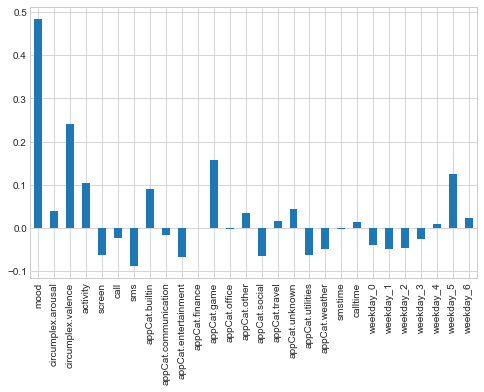

In [140]:
df.corr()['target'].drop('target').plot.bar(figsize=(8,5))

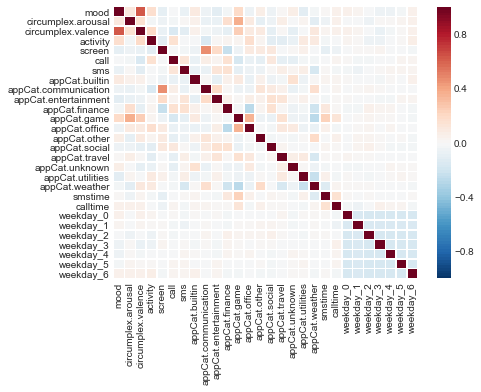

In [141]:
# Create a correlation plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
sns.heatmap(df.corr().drop('target').drop('target', axis=1), 
            vmin=-1, vmax=1, 
            xticklabels=True,
            yticklabels=True,
            cmap=sns.color_palette("RdBu_r", 100), 
            linewidths=.5);

In [123]:
df.corr()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,...,target,smstime,calltime,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
mood,1.000000,0.117283,0.633027,0.176383,-0.090383,-0.011449,-0.067580,0.083708,-0.054350,-0.114236,...,0.484284,0.101635,0.090679,0.056811,0.038570,-0.009429,-0.056710,-0.049719,-0.022516,0.044458
circumplex.arousal,0.117283,1.000000,0.140457,-0.037791,-0.053359,-0.027205,0.016527,0.056602,-0.064652,-0.075979,...,0.038653,-0.018167,-0.137358,-0.013514,-0.015299,-0.059230,0.011486,0.004454,0.028932,0.041948
circumplex.valence,0.633027,0.140457,1.000000,0.194443,-0.076121,-0.152470,-0.116806,0.056311,-0.037428,-0.041705,...,0.241819,0.145767,0.203002,0.054492,0.021064,-0.016408,-0.067550,-0.038401,0.000578,0.046873
activity,0.176383,-0.037791,0.194443,1.000000,-0.105919,0.147232,-0.016750,-0.017489,-0.153249,0.000605,...,0.103764,0.019745,0.122206,0.029058,0.000632,-0.056644,-0.042278,-0.009870,0.016134,0.062446
screen,-0.090383,-0.053359,-0.076121,-0.105919,1.000000,-0.018307,-0.026241,-0.058011,0.472839,0.192694,...,-0.063425,0.200031,0.080582,-0.006617,0.017321,0.019937,0.029070,-0.008689,-0.010800,-0.039249
call,-0.011449,-0.027205,-0.152470,0.147232,-0.018307,1.000000,0.135259,-0.064587,0.064492,0.024165,...,-0.024040,0.018087,0.098154,0.016856,-0.023012,-0.031919,-0.011001,-0.011345,0.021109,0.037824
sms,-0.067580,0.016527,-0.116806,-0.016750,-0.026241,0.135259,1.000000,-0.069270,-0.065066,0.129199,...,-0.088364,0.043478,0.046324,-0.029653,-0.042927,-0.010734,0.009984,0.020327,0.027310,0.023630
appCat.builtin,0.083708,0.056602,0.056311,-0.017489,-0.058011,-0.064587,-0.069270,1.000000,0.005108,-0.085855,...,0.089176,0.004060,0.028674,0.012365,-0.017956,-0.009536,-0.024224,0.008756,-0.011824,0.041458
appCat.communication,-0.054350,-0.064652,-0.037428,-0.153249,0.472839,0.064492,-0.065066,0.005108,1.000000,0.180231,...,-0.017298,0.127823,0.081459,-0.003087,0.017081,0.026439,0.003211,-0.013663,-0.009534,-0.019456
appCat.entertainment,-0.114236,-0.075979,-0.041705,0.000605,0.192694,0.024165,0.129199,-0.085855,0.180231,1.000000,...,-0.067233,0.049569,0.234298,0.019251,-0.014552,-0.009975,-0.023956,-0.031535,0.021092,0.038678
